In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from mygame_functions import GameSimulationSpy

In [237]:
emes = [(5 + i) for i in range(6)]

In [119]:
alpha = []
GS = []
GSPY = []
numponderas = 300
imprimecada = 30
enes = [300, 233]
for N, NB in zip(enes, [9, 7]):
    for M in emes:
        alpha.append(2**M / (N + 1))
        print("        ----------------------")
        print("        N = {}        ({}/{})".format(N, enes.index(N)+1, 2))
        print("        ----------------------")
        print('               M = {}        ({}/{})'.format(M,emes.index(M) + 1, len(emes)))
        print('               α = {:.3f}'.format(alpha[emes.index(M)]))

        gs = 0
        gspy = 0
        for i in range(numponderas):
            gain_s, gain_spy = GameSimulationSpy(N, M, NB, T=10000)
            gs += gain_s
            gspy += gain_spy
            if (i + 1) % imprimecada == 0:
                print('       ----> Ponderacion nº {}/{}'.format(i + 1, numponderas))
                print('       α = {:.3f}'.format(alpha[emes.index(M)]))
                print('             <Gs> = {:.5f}'.format(gs / (i + 1)))
                print('             <Gspy> = {:.5f}'.format(gspy / (i + 1)))
        GS.append(gs / numponderas)
        GSPY.append(gspy / numponderas)

GS = [x for _, x in sorted(zip(alpha, GS))]
GSPY = [x for _, x in sorted(zip(alpha, GSPY))]
alpha.sort()

        ----------------------
        N = 300        (1/2)
        ----------------------
               M = 5        (1/6)
               α = 0.106
       ----> Ponderacion nº 30/300
       α = 0.106
             <Gs> = -2.69687
             <Gspy> = 0.10406
       ----> Ponderacion nº 60/300
       α = 0.106
             <Gs> = -2.71512
             <Gspy> = 0.26687
       ----> Ponderacion nº 90/300
       α = 0.106
             <Gs> = -2.71805
             <Gspy> = 0.24610
       ----> Ponderacion nº 120/300
       α = 0.106
             <Gs> = -2.70883
             <Gspy> = 0.24291
       ----> Ponderacion nº 150/300
       α = 0.106
             <Gs> = -2.70148
             <Gspy> = 0.22634
       ----> Ponderacion nº 180/300
       α = 0.106
             <Gs> = -2.70073
             <Gspy> = 0.24861
       ----> Ponderacion nº 210/300
       α = 0.106
             <Gs> = -2.70214
             <Gspy> = 0.29874
       ----> Ponderacion nº 240/300
       α = 0.106
             <Gs

       ----> Ponderacion nº 150/300
       α = 0.106
             <Gs> = -1.95501
             <Gspy> = -0.00961
       ----> Ponderacion nº 180/300
       α = 0.106
             <Gs> = -1.96353
             <Gspy> = -0.02321
       ----> Ponderacion nº 210/300
       α = 0.106
             <Gs> = -1.95940
             <Gspy> = -0.01317
       ----> Ponderacion nº 240/300
       α = 0.106
             <Gs> = -1.95694
             <Gspy> = 0.00781
       ----> Ponderacion nº 270/300
       α = 0.106
             <Gs> = -1.95953
             <Gspy> = 0.00015
       ----> Ponderacion nº 300/300
       α = 0.106
             <Gs> = -1.96048
             <Gspy> = 0.00123
        ----------------------
        N = 233        (2/2)
        ----------------------
               M = 6        (2/6)
               α = 0.213
       ----> Ponderacion nº 30/300
       α = 0.213
             <Gs> = -0.59428
             <Gspy> = -0.37376
       ----> Ponderacion nº 60/300
       α = 0.213
           

In [122]:
file_name = "GAINS_GAINSPYvsALPHA_good_9,7NSpied_300,233N_" +str(numponderas) + "ponds"
with open('{}.dat'.format(file_name), 'w') as file:
    for i in range(len(GS)):
        file.write('{} {} {}\n'.format(alpha[i], GS[i], GSPY[i]))

In [167]:
numponderas = 100
alpha0 = []
GS0 = []
GSPY0 = []
file_name = "GAINS_GAINSPYvsALPHA_good_9,7NSpied_300,233N_" +str(numponderas) + "ponds"
with open('{}.dat'.format(file_name), 'r') as file:
    for line in file:
        value = line.split()
        value[2].split('\n')
        alpha0.append(float(value[0]))
        GS0.append(float(value[1]))
        GSPY0.append(float(value[2]))

In [168]:
NB = 3
N = 166
numponderas = 100
alpha1 = []
GS1 = []
GSPY1 = []
file_name = "GAINS_GAINSPYvsALPHA_good_" + str(NB) + 'NSpied_' + str(N)+ 'N_' +str(numponderas) + "ponds"
with open('{}.dat'.format(file_name), 'r') as file:
    for line in file:
        value = line.split()
        value[2].split('\n')
        alpha1.append(float(value[0]))
        GS1.append(float(value[1]))
        GSPY1.append(float(value[2]))

In [169]:
GSPYsum = GSPY1.copy()
GSPYsum.extend(GSPY0[3:5])
GSsum = GS1.copy()
GSsum.extend(GS0[3:5])
alphasum = alpha1.copy()
alphasum.extend(alpha0[3:5])

In [170]:
GSPYsum = [x for _, x in sorted(zip(alphasum, GSPYsum))]
GSsum = [x for _, x in sorted(zip(alphasum, GSsum))]
alphasum.sort()

In [174]:
file_name = "GAINS_GAINSPYvsALPHA_final"
with open('{}.dat'.format(file_name), 'w') as file:
    for i in range(len(GSsum)):
        file.write('{} {} {}\n'.format(alphasum[i], GSsum[i], GSPYsum[i]))

In [206]:
alphasum = []
GSsum = []
GSPYsum = []
file_name = "GAINS_GAINSPYvsALPHA_final"
with open('{}.dat'.format(file_name), 'r') as file:
    for line in file:
        value = line.split()
        value[2].split('\n')
        alphasum.append(float(value[0]))
        GSsum.append(float(value[1]))
        GSPYsum.append(float(value[2]))

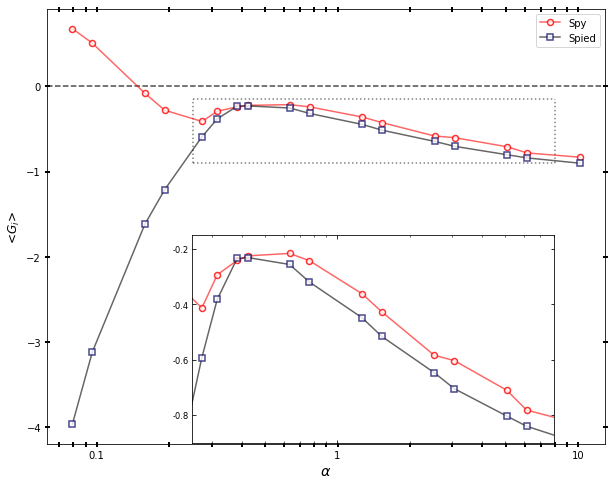

In [236]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax[0].set_facecolor('xkcd:eggshell')

ax.set(xscale='log')#, ylim=[-1,1])
ax.set_ylabel(r"<$G_i$>", fontsize='large')
ax.set_xlabel(r'$\alpha$', fontsize='x-large')
ax.tick_params(which='both', length=5, width = 2, direction = 'inout', 
                  labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                  bottom=True, top=True, left=True, right=True)

ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: ('{{:.{:1d}f}}'.format(
        int(np.maximum(-np.log10(x), 0)))).format(x)))

ax.axhline(y=0, color='k', alpha = .7, linestyle='--')

lin0, = ax.plot(alphasum[1:], GSPYsum[1:], lw=1.5, ls = '-', color = 'red', alpha=.6)
mark0, = ax.plot(alphasum[1:], GSPYsum[1:], ls = '', marker='o', mew = '1.5', ms = 6, alpha=.8, mec='red', mfc='w')

lin, = ax.plot(alphasum[1:], GSsum[1:], lw=1.5, ls = '-', color = 'k', alpha=.6)
mark, = ax.plot(alphasum[1:], GSsum[1:], ls = '', marker='s', mew = '1.5', ms = 6, alpha=.8, mec='midnightblue', mfc='w')


labels = ['Spy', 'Spied']
ax.legend([(lin0, mark0), (lin, mark)], labels, loc=0)

ax.hlines(y=-.9, xmin=.25, xmax = 8, color='k', alpha = .5, linestyle=':')
ax.hlines(y=-.15, xmin=.25, xmax = 8, color='k', alpha = .5, linestyle=':')
ax.vlines(x=.25, ymin =-.9 , ymax =-.15 , color='k', alpha = .5, linestyle=':')
ax.vlines(x=8, ymin =-.9 , ymax =-.15 , color='k', alpha = .5, linestyle=':')

axin = fig.add_axes([0.327, 0.127, 0.5025, 0.36])
axin.set(xscale='log')

axin.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('{{:.{:1d}f}}'.format(
                                                int(np.maximum(-np.log10(x), 0)))).format(x)))
axin.tick_params(which='both',direction='in',labelbottom=False,labeltop=False,
                 labelleft=True,labelright=False,bottom=True,top=True, left=True,right=True)

lin0, = axin.plot(alphasum[1:], GSPYsum[1:], lw=1.5, ls = '-', color = 'red', alpha=.6)
mark0, = axin.plot(alphasum[1:], GSPYsum[1:], ls = '', marker='o', mew = '1.5', ms = 6, alpha=.8, mec='red', mfc='w')

lin, = axin.plot(alphasum[1:], GSsum[1:], lw=1.5, ls = '-', color = 'k', alpha=.6)
mark, = axin.plot(alphasum[1:], GSsum[1:], ls = '', marker='s', mew = '1.5', ms = 6, alpha=.8, 
                  mec='midnightblue', mfc='w')

axin.set_ylim([-0.9, -0.15])
axin.set_xlim([0.25,8])

axin.tick_params(axis="x", labelsize='small')
axin.set_yticks([-0.8, -0.6, -0.4, -0.2])
axin.set_yticklabels(['-0.8', '-0.6', '-0.4', '-0.2'],
                     fontsize='small')

filename = "GainSPY,ALLvsALPHA_100,167N_3,5Nb_200ponderas.png"
fig.savefig(filename, bbox_inches='tight')